
Signal shape: (24000,)
Signal Datatype: int16
Signal duration: 3.0 seconds

Signal shape: (24000,)
Signal Datatype: float64

time_axis shape: (100,)
time_axis Datatype: float64


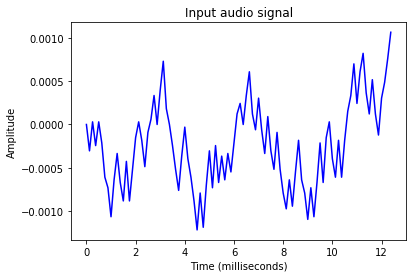

In [2]:
# Visualizing Audio Signals - Reading from a File and Working on it
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

''' Read the stored audio file. It will return two values: the sampling frequency and the audio signal. 
Provide the path of the audio file where it is stored, as shown here 
frequency_sampling, audio_signal = wavfile.read("/Users/admin/audio_file.wav")'''
# frequency_sampling, audio_signal = wavfile.read("s2.wav")
frequency_sampling, audio_signal = wavfile.read('s2.wav')

# Display the parameters like sampling frequency of the audio signal, data type of signal and its duration, using the commands shown 
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')

# This step involves normalizing the signal as shown below 
audio_signal = audio_signal / np.power(2, 15)
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)

# In this step, we are extracting the first 100 values from this signal to visualize. Use the following commands for this purpose 
audio_signal = audio_signal[:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)
print('\ntime_axis shape:', time_axis.shape)
print('time_axis Datatype:', time_axis.dtype)

# Now, visualize the signal using the commands given below 
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()




Signal shape: (24000,)
Signal Datatype: int16
Signal duration: 3.0 seconds


C:\Users\roopeshn\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


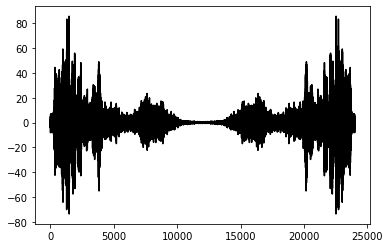

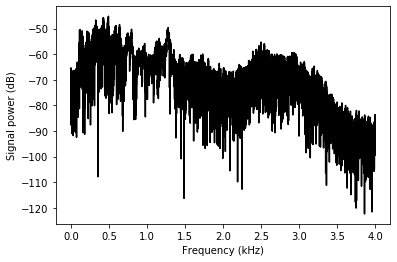

In [3]:
# Characterizing the Audio Signal: Transforming to Frequency Domain

# Import the necessary packages, as shown here 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

'''Now, read the stored audio file. It will return two values: the sampling frequency and the the audio signal. 
Provide the path of the audio file where it is stored as shown in the command here 
frequency_sampling, audio_signal = wavfile.read("/Users/admin/sample.wav")'''
#frequency_sampling, audio_signal = wavfile.read("s2.wav")
frequency_sampling, audio_signal = wavfile.read('s2.wav')

# In this step, we will display the parameters like sampling frequency of the audio signal, data type of signal and its duration, using the commands given below 
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')

# In this step, we need to normalize the signal, as shown in the following command 
audio_signal = audio_signal / np.power(2, 15)

# This step involves extracting the length and half length of the signal. Use the following commands for this purpose 
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)

# Now, we need to apply mathematics tools for transforming into frequency domain. Here we are using the Fourier Transform.
signal_frequency = np.fft.fft(audio_signal)
time = np.arange(0,len(signal_frequency),1)
plt.plot(time, signal_frequency, color='black')

# Now, do the normalization of frequency domain signal and square it 
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2

# Next, extract the length and half length of the frequency transformed signal 
len_fts = len(signal_frequency)

# Note that the Fourier transformed signal must be adjusted for even as well as odd case.
if length_signal % 2:
   signal_frequency[1:len_fts] *= 2
else:
   signal_frequency[1:len_fts-1] *= 2

# Now, extract the power in decibal(dB) 
signal_power = 10 * np.log10(signal_frequency)

# Adjust the frequency in kHz for X-axis 
x_axis = np.arange(0, len_fts, 1) * (frequency_sampling / length_signal) / 1000.0

# Now, visualize the characterization of signal as follows 
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

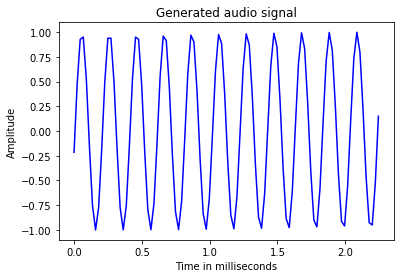

In [4]:
# Generating Monotone Audio Signal

# Import the necessary packages as shown 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Provide the file where the output file should be saved
output_file = 'audio_signal_generated.wav'

# Now, specify the parameters of your choice, as shown 
duration = 4 # in seconds
frequency_sampling = 44100 # in Hz
frequency_tone = 784
min_val = -4 * np.pi
max_val = 4 * np.pi

# In this step, we can generate the audio signal, as shown 
t = np.linspace(min_val, max_val, duration * frequency_sampling)
audio_signal = np.sin(2 * np.pi * frequency_tone * t)

# Now, save the audio file in the output file 
write(output_file, frequency_sampling, audio_signal)
# read the written signal
freq_sampling, audio_signal1 = wavfile.read('audio_signal_generated.wav')

# Extract the first 100 values for our graph, as shown 
audio_signal = audio_signal[:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

# Now, visualize the generated audio signal as follows 
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()

[[ 9.58384069e+00 -1.49506865e+01 -5.60900202e+00 ...  5.33502208e+00
  -6.27719721e+00 -2.29805256e+00]
 [ 9.89361733e+00 -1.61056418e+01 -6.60398816e+00 ...  5.46447306e+00
   6.03385196e-03 -1.10772002e+01]
 [ 1.02580831e+01 -1.58967665e+01 -6.76139259e+00 ... -8.86356085e-01
   2.26426615e+00  7.10855028e-01]
 ...
 [ 1.74325552e+01  1.18482099e+01 -2.73399377e+01 ... -3.16595899e+01
   5.80360123e+00 -9.39494953e+00]
 [ 1.70487910e+01  1.31428941e+01 -2.28662326e+01 ... -2.08411885e+01
   1.25675066e+01 -7.21224560e+00]
 [ 1.63709659e+01  1.28451627e+01 -1.91887073e+01 ... -1.46694358e+01
   9.24413631e+00 -8.35411250e+00]]

MFCC:
Number of windows = 186
Length of each feature = 13
[[ 2.42282852  3.20234703  3.85243015 ...  6.84119594  7.21483722
   6.99561845]
 [ 3.07183029  3.81203623  3.13096172 ...  7.55644314  7.10725563
   6.73096472]
 [ 3.27039288  4.37246464  3.3463334  ...  7.46975963  7.36967374
   7.03814321]
 ...
 [ 8.55153769 12.30387727 12.42657084 ... 11.72282414  9.

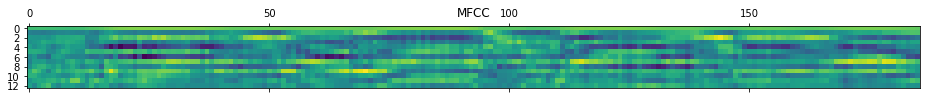

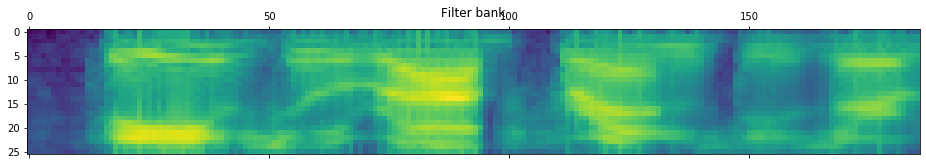

In [7]:
# Feature Extraction from Speech
# We can use different feature extraction techniques like MFCC, PLP, PLP-RASTA etc. for this purpose.

# Import the necessary packages, as shown here 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

# Now, read the stored audio file. It will return two values the sampling frequency and the audio signal. Provide the path of the audio file where it is stored.
frequency_sampling, audio_signal = wavfile.read('s2.wav')

# Note that here we are taking first 15000 samples for analysis.
audio_signal = audio_signal[:15000]

# Use the MFCC techniques and execute the following command to extract the MFCC features 
features_mfcc = mfcc(audio_signal, frequency_sampling)
print(features_mfcc)

# Now, print the MFCC parameters, as shown 
print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])

# Now, plot and visualize the MFCC features using the commands given below 
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC')

# In this step, we work with the filter bank features as shown 
# Extract the filter bank features 
filterbank_features = logfbank(audio_signal, frequency_sampling)
print(filterbank_features)

# Now, print the filterbank parameters.
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])

# Now, plot and visualize the filterbank features.
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()

# Speech 

In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result


In [3]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [6]:
def load_data(test_size=0.2):
    x,y=[],[]
    #for file in glob.glob("D:\\DataFlair\\ravdess data\\Actor_*\\*.wav"):
    for file in glob.glob("E:\DataSets\speech-emotion-recognition-ravdess-data\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)


In [28]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.10)

In [29]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(691, 77)


In [30]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [31]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,),
                    learning_rate='adaptive', max_iter=500)


In [32]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
#DataFlair - Predict for the test set
print(x_test.shape[0])
y_pred=model.predict(x_test)


77


In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))


[[18  1  1  1]
 [ 2 12  2  5]
 [ 1  0 10  4]
 [ 0  2  1 17]]


              precision    recall  f1-score   support

        calm       0.86      0.86      0.86        21
     disgust       0.80      0.57      0.67        21
     fearful       0.71      0.67      0.69        15
       happy       0.63      0.85      0.72        20

    accuracy                           0.74        77
   macro avg       0.75      0.74      0.73        77
weighted avg       0.75      0.74      0.74        77

Accuracy: 74.03%


In [35]:
'''Steps for speech emotion recognition python projects
1. Make the necessary imports:'''

''' 2. Define a function extract_feature to extract the mfcc, chroma, and mel features from a sound file. 
This function takes 4 parameters- the file name and three Boolean parameters for the three features:
mfcc: Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound
chroma: Pertains to the 12 different pitch classes
mel: Mel Spectrogram Frequency'''
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
'''3. Now, let’s define a dictionary to hold numbers and the emotions available in the RAVDESS dataset, 
and a list to hold those we want- calm, happy, fearful, disgust.'''
#DataFlair - Emotions in the RAVDESS dataset

''' Prepare with DataFlair – 4. Now, let’s load the data with a function load_data() – this takes in the 
relative size of the test set as parameter. x and y are empty lists; we’ll use the glob() function from 
the glob module to get all the pathnames for the sound files in our dataset. The pattern we use for this 
is: “D:\\DataFlair\\ravdess data\\Actor_*\\*.wav”. This is because our dataset looks like this:'''
#path = '/Users/subarna/Old-Laptop-Doc/univ\ 2016/study\ material/AI/FT19/Lab-doc/sr/speech-emotion-recognition-ravdess-data/'
#DataFlair - Load the data and extract features for each sound file
#So, for each such path, get the basename of the file, the emotion by splitting the name around ‘-’ and extracting the third value:
''' Using our emotions dictionary, this number is turned into an emotion, and our function checks whether 
this emotion is in our list of observed_emotions; if not, it continues to the next file. It makes a call to 
extract_feature and stores what is returned in ‘feature’. Then, it appends the feature to x and the emotion to y. 
So, the list x holds the features and y holds the emotions. 
We call the function train_test_split with these, the test size, and a random state value, and return that.'''
# 5. Time to split the dataset into training and testing sets! Let’s keep the test set 25% of everything and use the load_data function for this.
#DataFlair - Split the dataset


#DataFlair - Get the shape of the training and testing datasets


#DataFlair - Get the number of features extracted




#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.03%
